In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.keras import backend as K

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov  2 18:30:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from zipfile import ZipFile
  
with ZipFile("/content/drive/MyDrive/melspec.zip", 'r') as zObject:
  zObject.extractall(path="/content/runtime_data/")
zObject.close()

### Birdcall classfication - Modelling 🐦
Dishita Midha

200968196

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import numpy as np
import pandas as pd
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from IPython.display import Image
from PIL import Image
from IPython.display import Audio
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
# from torch.utils.data import Dataset, DataLoader
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy.random import seed
seed(42)
tf.random.set_seed(42)

In [ ]:
chunk0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk0_0.csv')
chunk1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk1_1.csv')
chunk2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk2_2.csv')
chunk3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk3_3.csv')
chunk4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk4_4.csv')
chunk5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/train_csv/chunk5_5.csv')

In [ ]:
birds = pd.concat([chunk0, chunk1, chunk2, chunk3, chunk4, chunk5])
birds

,Unnamed: 0,image_path,specie_type
0,0,/content/drive/MyDrive/spectograms_new/train_i...,bcnher
1,1,/content/drive/MyDrive/spectograms_new/train_i...,bcnher
2,2,/content/drive/MyDrive/spectograms_new/train_i...,bcnher
3,3,/content/drive/MyDrive/spectograms_new/train_i...,bcnher
4,4,/content/drive/MyDrive/spectograms_new/train_i...,bcnher
...,...,...,...
4704,4704,/content/drive/MyDrive/spectograms_new/train_i...,wesmea
4705,4705,/content/drive/MyDrive/spectograms_new/train_i...,wesmea
4706,4706,/content/drive/MyDrive/spectograms_new/train_i...,wesmea
4707,4707,/content/drive/MyDrive/spectograms_new/train_i...,wesmea


In [ ]:
new_image_paths = []
for path in birds['image_path']:
  components = path.split('/MyDrive/')
  path = '/content/runtime_data/' + components[1]
  new_image_paths.append(path)

In [ ]:
birds = birds.assign(runtime_image_path = new_image_paths)
birds

,Unnamed: 0,image_path,specie_type,runtime_image_path
0,0,/content/drive/MyDrive/spectograms_new/train_i...,bcnher,/content/runtime_data/spectograms_new/train_im...
1,1,/content/drive/MyDrive/spectograms_new/train_i...,bcnher,/content/runtime_data/spectograms_new/train_im...
2,2,/content/drive/MyDrive/spectograms_new/train_i...,bcnher,/content/runtime_data/spectograms_new/train_im...
3,3,/content/drive/MyDrive/spectograms_new/train_i...,bcnher,/content/runtime_data/spectograms_new/train_im...
4,4,/content/drive/MyDrive/spectograms_new/train_i...,bcnher,/content/runtime_data/spectograms_new/train_im...
...,...,...,...,...
4704,4704,/content/drive/MyDrive/spectograms_new/train_i...,wesmea,/content/runtime_data/spectograms_new/train_im...
4705,4705,/content/drive/MyDrive/spectograms_new/train_i...,wesmea,/content/runtime_data/spectograms_new/train_im...
4706,4706,/content/drive/MyDrive/spectograms_new/train_i...,wesmea,/content/runtime_data/spectograms_new/train_im...
4707,4707,/content/drive/MyDrive/spectograms_new/train_i...,wesmea,/content/runtime_data/spectograms_new/train_im...


In [ ]:
birds = birds.sample(frac = 1)

In [ ]:
birds = birds[['runtime_image_path', 'specie_type']]

In [ ]:
encoder = LabelEncoder()
birds['primary_label_encoded'] = encoder.fit_transform(birds['specie_type'])

In [ ]:
birds

,runtime_image_path,specie_type,primary_label_encoded
2229,/content/runtime_data/spectograms_new/train_im...,brnowl,2
2774,/content/runtime_data/spectograms_new/train_im...,mallar3,11
1305,/content/runtime_data/spectograms_new/train_im...,houfin,9
2207,/content/runtime_data/spectograms_new/train_im...,norcar,12
2111,/content/runtime_data/spectograms_new/train_im...,houspa,10
...,...,...,...
10774,/content/runtime_data/spectograms_new/train_im...,normoc,13
3003,/content/runtime_data/spectograms_new/train_im...,dunlin,5
860,/content/runtime_data/spectograms_new/train_im...,bcnher,0
4994,/content/runtime_data/spectograms_new/train_im...,normoc,13


In [ ]:
#splitting dataset into train test and validation
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

train = birds['runtime_image_path']
test = birds['specie_type']

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size= 1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio)) 


In [ ]:
def generate_df(X, y):
  df = pd.DataFrame()
  df['runtime_image_path'] = X
  df['specie_type'] = y
  return df

train_df = generate_df(X_train, y_train)
val_df = generate_df(X_val, y_val)
test_df = generate_df(X_test, y_test)


In [ ]:
class config:
  size = (299, 299)
  epochs = 20

## Creating data generators for train, test, val

In [ ]:
birds_classes= [*set(birds['specie_type'].tolist())]

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,  
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)



### Another type of data generator

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=None,
x_col="runtime_image_path",
y_col="specie_type",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=config.size)

Found 21110 validated image filenames belonging to 17 classes.


In [ ]:
valid_generator=valid_datagen.flow_from_dataframe(
dataframe=val_df,
directory=None,
x_col="runtime_image_path",
y_col="specie_type",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=config.size)

Found 2639 validated image filenames belonging to 17 classes.


In [ ]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory=None,
x_col="runtime_image_path",
y_col=None,
batch_size=16,
shuffle=False,
class_mode=None,
target_size=config.size)

Found 2639 validated image filenames.


In [ ]:
birds_encoding2 = {}
print('****************')
for cls, idx in train_generator.class_indices.items():
    print('Class nr ',idx,' -> ', cls)
    birds_encoding2[cls] = idx
print('****************')

****************
Class nr  0  ->  bcnher
Class nr  1  ->  bkbplo
Class nr  2  ->  brnowl
Class nr  3  ->  cangoo
Class nr  4  ->  comsan
Class nr  5  ->  dunlin
Class nr  6  ->  eurwig
Class nr  7  ->  gnwtea
Class nr  8  ->  gwfgoo
Class nr  9  ->  houfin
Class nr  10  ->  houspa
Class nr  11  ->  mallar3
Class nr  12  ->  norcar
Class nr  13  ->  normoc
Class nr  14  ->  rorpar
Class nr  15  ->  skylar
Class nr  16  ->  wesmea
****************


# MODEL

In [ ]:
net = Xception(include_top=False,
                        weights='imagenet',
                          input_tensor=None,
                        input_shape=(299,299,3))
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(17, activation='softmax', name='softmax')(x)
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:20]:
    layer.trainable = False
for layer in net_final.layers[20:]:
    layer.trainable = True
net_final.compile(optimizer=Adam(lr=5e-4),
                  loss='categorical_crossentropy', metrics=['accuracy'])
print(net_final.summary())

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [ ]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
#model compiling
net_final.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = net_final.fit_generator(train_generator, validation_data = valid_generator, callbacks = [early_stop, rlrop],verbose = 1, epochs = config.epochs)
net_final.save("/content/drive/MyDrive/Colab Notebooks/birdclef-2022/model/xception-with-new-data.h5")

Epoch 1/20
1320/1320 [==============================] - 572s 423ms/step - loss: 1.4274 - accuracy: 0.5608 - val_loss: 1.2842 - val_accuracy: 0.7014 - lr: 1.0000e-04
Epoch 2/20
1320/1320 [==============================] - 557s 422ms/step - loss: 0.9405 - accuracy: 0.7123 - val_loss: 0.8481 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 3/20
1320/1320 [==============================] - 556s 421ms/step - loss: 0.7900 - accuracy: 0.7585 - val_loss: 0.6506 - val_accuracy: 0.8064 - lr: 1.0000e-04
Epoch 4/20
1320/1320 [==============================] - 557s 422ms/step - loss: 0.6887 - accuracy: 0.7858 - val_loss: 0.6363 - val_accuracy: 0.8083 - lr: 1.0000e-04
Epoch 5/20
1320/1320 [==============================] - 556s 421ms/step - loss: 0.6246 - accuracy: 0.8077 - val_loss: 0.6664 - val_accuracy: 0.8086 - lr: 1.0000e-04
Epoch 6/20
1320/1320 [==============================] - 555s 420ms/step - loss: 0.5636 - accuracy: 0.8251 - val_loss: 0.5749 - val_accuracy: 0.8450 - lr: 1.0000e-04
Epoch 7/20

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/model/train_history_xception_with_new_data', 'wb') as file_pi:
    pickle.dump(model_history.history, file_pi)

In [ ]:
net_final.save_weights("/content/drive/MyDrive/Colab Notebooks/birdclef-2022/model/xception_with_new_data-2.h5")

# metric analysis

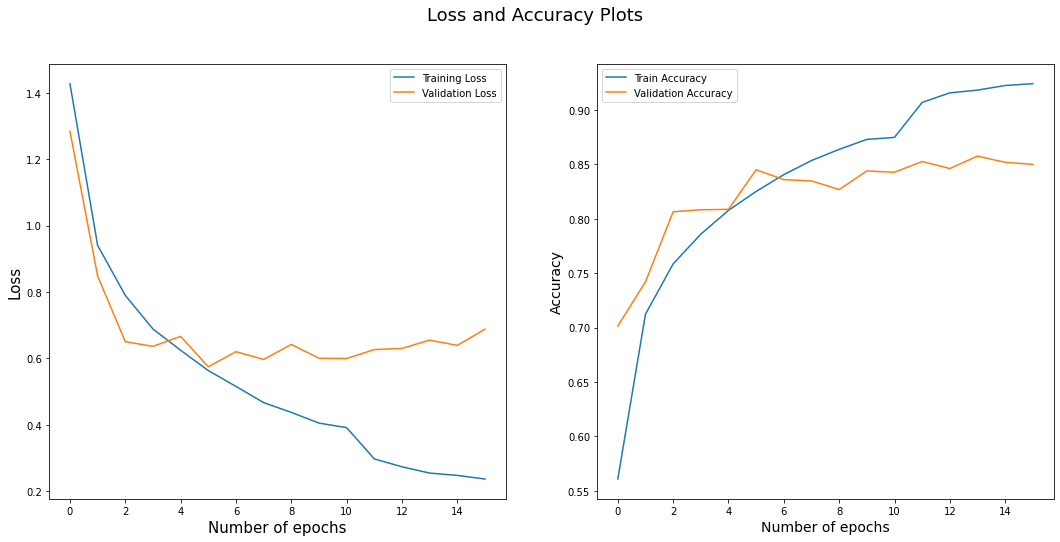

In [ ]:
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
net_final = load_model('/content/drive/MyDrive/Colab Notebooks/birdclef-2022/model/xception-with-new-data.h5')

In [ ]:
valid_loss, valid_accuracy = net_final.evaluate_generator(generator = valid_generator, verbose = 1)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")

165/165 [==============================] - 23s 134ms/step - loss: 0.5749 - accuracy: 0.8450
Validation Accuracy:  84.5 %


In [ ]:
test_generator.reset()
pred=net_final.predict_generator(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

165/165 [==============================] - 22s 127ms/step


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [ ]:
results.to_csv('res.csv')
test_df.to_csv('test_df.csv')

In [ ]:
count = 0
for x,y in zip(results['Predictions'], test_df['specie_type']):
  if x == y:
    count = count + 1

count



2167

In [ ]:
print("Accuracy :" + str(count* 100 /len(results)) + "%")

Accuracy :82.11443728685109%


In [ ]:
test_class_indices = []
for i in test_df['specie_type']:
  test_class_index = birds_encoding2[i]
  test_class_indices.append(test_class_index)

test_class_indices = np.array(test_class_indices)
test_class_indices

array([13, 13,  4, ..., 15,  5, 16])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
cm = confusion_matrix(test_class_indices, predicted_class_indices)
print(cm)

[[ 39   0  11   2   0   1   1   7   2   1   0   0   6   7   0   2   4]
 [  0  21   2   0   0   3   0   0   0   0   0   1   0   2   0   2   3]
 [  0   0 158   0   0   2   0   0   0   0   0   4   5   1   0   0   6]
 [  0   0   1  35   0   0   0   0   0   0   0   1   4   1   0   0   5]
 [  0   0   5   1  98   4   0   0   0   0   0   1   1   0   0   0   2]
 [  0   0  13   1   2 145   1   0   1   0   1   4   2   2   1   2   3]
 [  1   0   9   0   1   9  19   1   0   0   0   6   6   1   3   1   2]
 [  0   0   7   0   0   4   0  38   0   0   1   6   4   2   1   0   2]
 [  0   0   1   3   0   0   0   2  15   0   0   2   0   1   0   0   0]
 [  0   0   1   1   0   0   0   0   0 126   6   0  11   7   1   2   5]
 [  0   0   1   1   0   1   0   0   0   0  68   0   2   7   1   4   1]
 [  4   0   2   0   1   4   2   1   0   0   0  49   3   4   0   0   2]
 [  2   0   2   1   0   5   0   2   1   0   4   1 357   7   3   1   9]
 [  2   0   7   3   0   9   0   0   1   4   4   0  26 571   2   7  10]
 [  0 

In [ ]:
cr = classification_report(test_class_indices, predicted_class_indices, target_names = birds_classes)
print(cr)

              precision    recall  f1-score   support

      houfin       0.78      0.47      0.59        83
      brnowl       1.00      0.62      0.76        34
      wesmea       0.66      0.90      0.76       176
      bcnher       0.69      0.74      0.71        47
      gnwtea       0.96      0.88      0.92       112
     mallar3       0.76      0.81      0.79       178
      normoc       0.79      0.32      0.46        59
      gwfgoo       0.73      0.58      0.65        65
      rorpar       0.75      0.62      0.68        24
      dunlin       0.95      0.79      0.86       160
      bkbplo       0.81      0.79      0.80        86
      cangoo       0.64      0.68      0.66        72
      eurwig       0.81      0.90      0.86       395
      comsan       0.91      0.88      0.90       646
      norcar       0.72      0.77      0.75        44
      houspa       0.81      0.84      0.83       127
      skylar       0.82      0.87      0.84       331

    accuracy              